<h1>Training</h1>

<h2>Import Libraries</h2>

In [1]:
import lightgbm as lgb

import pandas as pd
import numpy as np

from sklearn.metrics import mean_squared_error

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import pickle
%matplotlib inline

seed = 7

<h2>Settings</h2>

In [2]:
ds_preproc_path = "dataset/preproc/"
ds_original_path = "dataset/original/"
models_path = "models/"
target = "item_cnt_month"

<h2>Loading Datas</h2>

In [3]:
X_train_full = pd.read_csv(ds_preproc_path + 'X_train.csv')
X_val_full = pd.read_csv(ds_preproc_path + 'X_val.csv')
X_test_full = pd.read_csv(ds_preproc_path + 'X_test.csv')

test = pd.read_csv(ds_original_path + 'test.csv')

In [4]:
X_train = X_train_full
Y_train = X_train_full[target].astype(int)
X_train = X_train.drop(columns=['item_cnt_month', 'item_price_month'])
X_train.shape

X_val = X_val_full
Y_val = X_val_full[target].astype(int)
X_val = X_val.drop(columns=['item_cnt_month', 'item_price_month'])
X_val.shape

X_test = X_test_full.drop(['item_cnt_month', 'item_price_month'], axis=1)
X_test.shape

del X_train_full, X_val_full, X_test_full

(10238683, 14)

(238172, 14)

(214200, 14)

<h2>Models</h2>

<h3>GBDT</h3>

<h4>Training</h4>

Setting the hyperparameters of the model and start to train it

In [5]:
def train_gbdt_model(X_train, Y_train, X_val, Y_val):
    lgb_params = {'num_leaves': 255, 
                  'max_depth': 32, 
                  'max_bin': 64, 
                  'bagging_freq': 1, 
                  'bagging_fraction': 0.75, 
                  'feature_fraction': 0.5, 
                  'min_data_in_leaf': 2**8,
                  'learning_rate': 0.017, 
                  'num_jobs': 4, # Set your number of physical cores for maximum speed
                  'random_state' : seed,
                  'bagging_seed' : seed,
                  'boost_from_average' : 'true', # adjusts initial score to the mean of labels to speed up convergence
                  'boost' : 'gbdt',
                  'metric' : 'rmse',
                  'verbose' : 1}

    lgb_train = lgb.Dataset(X_train, label=Y_train)
    lgb_val = lgb.Dataset(X_val, label=Y_val)

    return lgb.train(lgb_params, 
                     lgb_train, 
                     valid_sets=[lgb_train, lgb_val],
                     num_boost_round=600,
                     early_stopping_rounds=20)

In [6]:
X_train.shape
X_val.shape
X_test.shape

(10238683, 14)

(238172, 14)

(214200, 14)

In [7]:
gbdt_model = train_gbdt_model(X_train, Y_train, X_val, Y_val)

[1]	training's rmse: 1.21937	valid_1's rmse: 1.13264
Training until validation scores don't improve for 20 rounds
[2]	training's rmse: 1.21218	valid_1's rmse: 1.12731
[3]	training's rmse: 1.20546	valid_1's rmse: 1.1224
[4]	training's rmse: 1.19972	valid_1's rmse: 1.11834
[5]	training's rmse: 1.19344	valid_1's rmse: 1.11381
[6]	training's rmse: 1.18714	valid_1's rmse: 1.10938
[7]	training's rmse: 1.18094	valid_1's rmse: 1.10491
[8]	training's rmse: 1.17519	valid_1's rmse: 1.10018
[9]	training's rmse: 1.17081	valid_1's rmse: 1.09717
[10]	training's rmse: 1.16853	valid_1's rmse: 1.09482
[11]	training's rmse: 1.16382	valid_1's rmse: 1.09161
[12]	training's rmse: 1.15832	valid_1's rmse: 1.08779
[13]	training's rmse: 1.15382	valid_1's rmse: 1.08529
[14]	training's rmse: 1.14834	valid_1's rmse: 1.081
[15]	training's rmse: 1.14569	valid_1's rmse: 1.07853
[16]	training's rmse: 1.14293	valid_1's rmse: 1.07643
[17]	training's rmse: 1.13889	valid_1's rmse: 1.07372
[18]	training's rmse: 1.13649	val

[149]	training's rmse: 0.943149	valid_1's rmse: 0.955428
[150]	training's rmse: 0.942733	valid_1's rmse: 0.955311
[151]	training's rmse: 0.942342	valid_1's rmse: 0.954989
[152]	training's rmse: 0.942074	valid_1's rmse: 0.954685
[153]	training's rmse: 0.941873	valid_1's rmse: 0.95469
[154]	training's rmse: 0.941525	valid_1's rmse: 0.954535
[155]	training's rmse: 0.94123	valid_1's rmse: 0.954532
[156]	training's rmse: 0.940903	valid_1's rmse: 0.954207
[157]	training's rmse: 0.940432	valid_1's rmse: 0.953958
[158]	training's rmse: 0.940286	valid_1's rmse: 0.953746
[159]	training's rmse: 0.939896	valid_1's rmse: 0.953563
[160]	training's rmse: 0.939247	valid_1's rmse: 0.953382
[161]	training's rmse: 0.939003	valid_1's rmse: 0.953351
[162]	training's rmse: 0.938664	valid_1's rmse: 0.95327
[163]	training's rmse: 0.938214	valid_1's rmse: 0.952894
[164]	training's rmse: 0.937741	valid_1's rmse: 0.952713
[165]	training's rmse: 0.937334	valid_1's rmse: 0.952461
[166]	training's rmse: 0.936723	va

[294]	training's rmse: 0.911114	valid_1's rmse: 0.941476
[295]	training's rmse: 0.911024	valid_1's rmse: 0.941253
[296]	training's rmse: 0.910854	valid_1's rmse: 0.94115
[297]	training's rmse: 0.910706	valid_1's rmse: 0.9411
[298]	training's rmse: 0.910608	valid_1's rmse: 0.941135
[299]	training's rmse: 0.910483	valid_1's rmse: 0.941179
[300]	training's rmse: 0.910384	valid_1's rmse: 0.941163
[301]	training's rmse: 0.91025	valid_1's rmse: 0.941082
[302]	training's rmse: 0.910086	valid_1's rmse: 0.941096
[303]	training's rmse: 0.909969	valid_1's rmse: 0.941047
[304]	training's rmse: 0.909869	valid_1's rmse: 0.94102
[305]	training's rmse: 0.909711	valid_1's rmse: 0.941014
[306]	training's rmse: 0.909635	valid_1's rmse: 0.941008
[307]	training's rmse: 0.909486	valid_1's rmse: 0.94092
[308]	training's rmse: 0.909377	valid_1's rmse: 0.940881
[309]	training's rmse: 0.909263	valid_1's rmse: 0.9408
[310]	training's rmse: 0.909155	valid_1's rmse: 0.940717
[311]	training's rmse: 0.909041	valid_1

[439]	training's rmse: 0.897338	valid_1's rmse: 0.936396
[440]	training's rmse: 0.897291	valid_1's rmse: 0.936379
[441]	training's rmse: 0.89723	valid_1's rmse: 0.936319
[442]	training's rmse: 0.897189	valid_1's rmse: 0.936357
[443]	training's rmse: 0.897131	valid_1's rmse: 0.936347
[444]	training's rmse: 0.896993	valid_1's rmse: 0.936578
[445]	training's rmse: 0.896965	valid_1's rmse: 0.936578
[446]	training's rmse: 0.896882	valid_1's rmse: 0.936551
[447]	training's rmse: 0.896815	valid_1's rmse: 0.93651
[448]	training's rmse: 0.89672	valid_1's rmse: 0.936561
[449]	training's rmse: 0.896689	valid_1's rmse: 0.936523
[450]	training's rmse: 0.896594	valid_1's rmse: 0.936511
[451]	training's rmse: 0.896551	valid_1's rmse: 0.936489
[452]	training's rmse: 0.89645	valid_1's rmse: 0.936515
[453]	training's rmse: 0.896365	valid_1's rmse: 0.936523
[454]	training's rmse: 0.896272	valid_1's rmse: 0.936573
[455]	training's rmse: 0.896235	valid_1's rmse: 0.936575
[456]	training's rmse: 0.896188	val

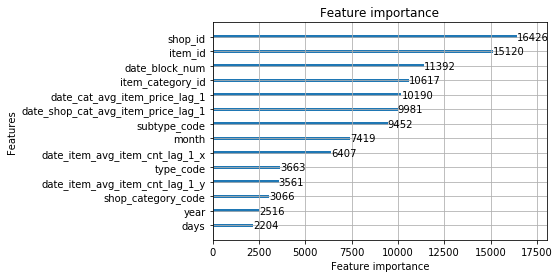

In [8]:
lgb.plot_importance(gbdt_model)

In [9]:
y_hat = gbdt_model.predict(X_val).clip(0, 20)
rmse = np.sqrt(mean_squared_error(Y_val.clip(0, 20), y_hat))
print("RMSE = {}".format(round(rmse, 4)))

RMSE = 0.9363


Dumping the model

In [10]:
with open(models_path + 'gbdt_model.pickle', 'wb') as handle:
    pickle.dump(gbdt_model, handle)

<h4>Testing</h4>

In [11]:
gbdt_model = pickle.load(open(models_path + "gbdt_model.pickle", "rb"))

y_pred = gbdt_model.predict(X_test).clip(0, 20)
X_test['item_cnt_month'] = y_pred

submit = pd.merge(test, X_test, how='left', on=['shop_id', 'item_id'])
submit = submit[['ID', 'item_cnt_month']]
submit.to_csv('submission.csv', index=False)